In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
# import cupy as np
import tensorflow as tf
from tensorflow import keras
from ideal_gas import *
import pickle
# import tensorflow.experimental.numpy as np
print("Num GPUs Available: {}".format(len(tf.config.experimental.list_physical_devices("GPU"))))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)

pygame 2.2.0 (SDL 2.30.2, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
Num GPUs Available: 1
True
2.10.1


In [5]:
def O(N, n):
    return np.math.factorial(N)/(np.math.factorial(N-n) * np.math.factorial(n))

In [6]:
divisions = 1
divisor = 1
if divisor < 1:
    print("Make divisor > 1")
    raise
WIDTH = BOX_WIDTH
physical_boundaries = [WIDTH*(n/divisor) for n in range(1, divisions+1)]
for boundary in physical_boundaries:
    if boundary >= 2600:
        raise


demon_speed_boundaries = [3, 6, 9, 12, 15, 17, 19, 21, 23, 25]
trials = 100
total_number_of_simulations = len(demon_speed_boundaries)*len(physical_boundaries)*trials
N_particles = 30
# boundaries = [WIDTH/12, WIDTH*(2/12), WIDTH*(3/12), WIDTH*(4/12), WIDTH*(5/12),]
print(demon_speed_boundaries, physical_boundaries)
print("Simulations: {}".format(total_number_of_simulations))

[3, 6, 9, 12, 15, 17, 19, 21, 23, 25] [1300.0]
Simulations: 1000


#### Particles on the L Region have a speed less than the demon speed at the physical boundary. Particles on the R Region have a speed greater than or equal to the demon speed at the physical boundary

1000


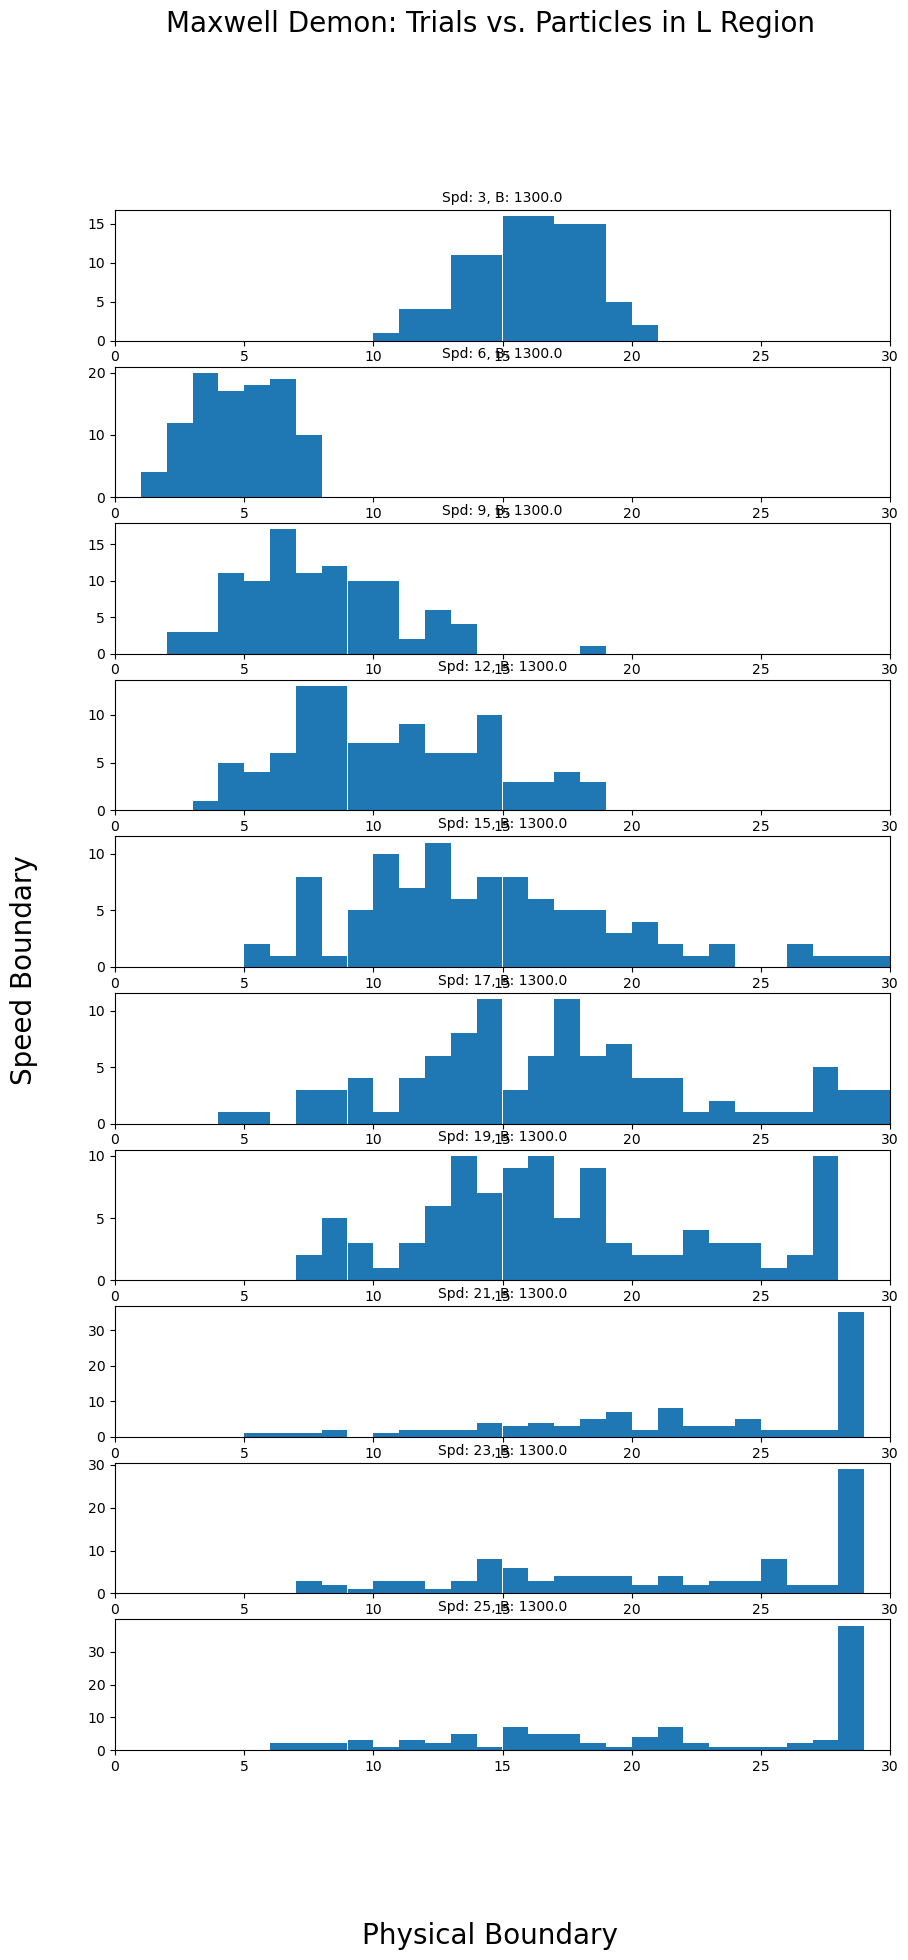

In [9]:
with open("demon_data07.p", "rb") as f:
    sims = pickle.load(f)

print(len(sims))

# sims = []
# for n in range(0, 3):
#     with open("demon_data_piece{}.p".format(n), "rb") as f:
#         x = pickle.load(f)
#     sims += x
# print(len(sims))

font_size = 20

fig, axs = plt.subplots(nrows=len(demon_speed_boundaries), ncols=len(physical_boundaries), 
                        figsize=(10, 20))
try:
    print(axs.shape[1])
except IndexError as e:
    axs = axs.reshape(len(demon_speed_boundaries), 1)

i = 0 # simulation index
fig.suptitle('Maxwell Demon: Trials vs. Particles in L Region', fontsize=font_size)

for num1 in range(len(demon_speed_boundaries)):
    for num2 in range(len(physical_boundaries)):
        position_data = np.array([sims[j][0][0] for j in range(i, trials+i)])
        i += trials
        bin_heights, bin_borders, _ = axs[num1, num2].hist(position_data, bins=(max(position_data)-min(position_data)), label="histogram")
        axs[num1, num2].set_xlim([0, N_particles])
        axs[num1, num2].set_title("Spd: {}, B: {}".format(demon_speed_boundaries[num1], physical_boundaries[num2]), fontsize=10)

fig.supxlabel("Physical Boundary", fontsize=font_size)
fig.supylabel("Speed Boundary", fontsize=font_size)
plt.show()

In [24]:
k = 1.380649e-23 # boltzmann constant
def maxwell_boltzmann(v, A, B, T):
	f = A/(T**(3/2))*(v**2)*np.exp((B*(v**2))/T)
	return f

# Curve fit a gaussian to a histogram
def gaussian(x, mean, standard_deviation, amplitude):
    return amplitude * np.exp(-(x-mean)**2 / (2*standard_deviation**2)) 